In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
N1 = 0
N2 = 0

In [4]:
def func1(x):
  global N1
  N1 = N1 + 1
  return np.cos(x)/(x**2)

def func1U(x):
  return np.cos(x)/(x**2)

def func1D1(x):
  return (x*np.sin(x) + 2 * np.cos(x))/(x**3)

def func2(x):
  global N2
  N2 = N2 + 1
  return x/10 - 2 * np.sin(4*x)

def func2U(x):
  return x/10 - 2 * np.sin(4*x)

def func2D1(x):
  return 1/10 - 8*np.cos(4*x)

In [5]:
def perebor(start, stop, epsilon, cb):
  stepsAmount = int((stop-start)/epsilon)
  minFuncValue = cb(start)
  minArg = start
  for var in np.linspace(start, stop, num=stepsAmount):
    eval = cb(var)
    if (minFuncValue > eval):
      minFuncValue = eval
      minArg = var
  return (minFuncValue, minArg)

In [6]:
# print(perebor(1, 12,1e-6,func1))
# print(perebor(0, 4,1e-6,func2))

In [7]:
sorted([1, 3,2, 4], reverse=True)

[4, 3, 2, 1]

In [10]:
def lom(start, stop, epsilon, cb, cbU, cbD):
  lipsic = max(cbD(np.linspace(start, stop, num=int((stop-start)/1e-3))))
  x0 = (cb(start) - cb(stop) + lipsic*(start + stop))/(2*lipsic)
  y0 = (cb(start) - cb(stop) + lipsic*(start - stop))/(2*lipsic)
  res = ()
  xAxis = np.linspace(start, stop, num=200)
  yAxis = cb(xAxis)

  plt.ion()
  plt.plot(xAxis, yAxis)

  ps = [(x0, y0)]
  prevP = (x0, y0)
  plt.plot([start, x0],[getP(start, stop, cbU,lipsic, x0, start), y0])
  plt.plot([x0, stop],[y0, getP(start, stop, cbU,lipsic, x0, stop)])
  flag = False
  while True:
    ps = sorted(ps, key=lambda x: x[0], reverse=True)

    if flag:
      plt.plot([ps[0][0], prevP[0]],[ps[0][1], getP(start, prevP[0], cbU,lipsic, x0, prevP[0])])
      plt.plot([prevP[0], ps[1][0]],[getP(prevP[0], stop, cbU,lipsic, x0, prevP[0]), ps[1][1]])


    ps = sorted(ps, key=lambda x: x[1], reverse=True)
    p = ps.pop()
    f = cb(p[0])


    delta = 1 / (2 * lipsic)*(f - p[1])
    if (2*lipsic*delta <= epsilon):
      res = (p[0], f)
      break
    prevP = p
    
    # ps.append((p[0] - delta, (f + getP(start, stop, cb, lipsic, x0, p[0]))/2))
    # ps.append((p[0] + delta, (f + getP(start, stop, cb, lipsic, x0, p[0]))/2))
    ps.append((p[0] - delta, (f + p[0])/2))
    ps.append((p[0] + delta, (f + p[0])/2))
    # print(ps)
    flag = True

  return res

def getP(start, stop, cb, lipsic, x0, x):
  if x <= x0:
    return cb(start) - lipsic*(x - start)
  else:
    return cb(stop) + lipsic*(x - stop)

(5.238916185319683, 0.018309753738293646)

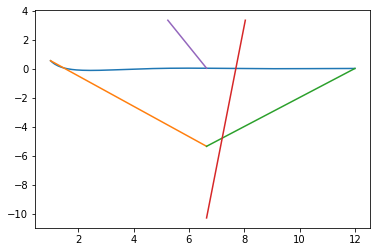

In [11]:
lom(1, 12,1e-1,func1, func1U, func1D1)